Integración y derivación numéricas.

Por Pablo Angulo y Fabricio Macià para ETSIN@UPM

In [1]:
import numpy as np
import numpy.random

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.interpolate import lagrange
from scipy.integrate import quad
import scipy.integrate as integ

import sympy as sym

# Integración numérica con las técnicas del grado

Vamos a implementar varias reglas de integración numérica que los alumnos de esta Escuela vistéis en Cálculo I. Comenzaremos con la **"regla simple del punto izquierdo"**, que aproxima la integral de $f$ en e intervalo $[a,b]$ por el área del rectángulo de base $b-a$ y altura $f(a)$:
$$
\int_a^b f(x)\:d x \approx (b-a)f(a)
$$

In [2]:
def punto_izquierdo_simple(f, a, b):
    '''Aproxima la integral de f en el intervalo [a,b] por (b-a)*f(a)
    
    El primer argumento es una función de variable real a valores reales
    '''
    return (b-a)*f(a)

In [3]:
f = lambda x: 1 + np.sin(x)
print(punto_izquierdo_simple(f, 0 ,np.pi))

3.141592653589793


Vamos a verlo gráficamente

In [4]:
### AVISO ###
### No necesitais entender ni replicar las gráficas de este cuaderno ###
### Solo las he puesto para ilustrar los conceptos ###
a, b = 0, np.pi/2
eps  = 0.01
xs = np.linspace(a-eps,b+eps,200)
ys = f(xs)
integral, error = quad(f, a, b)
punto_izquierdo = np.piecewise(xs, [xs < a, (a <= xs) & (xs < b), b <= xs ], [0, f(a) ,0])
integral_punto_izquierdo_simple = punto_izquierdo_simple(f, a, b)

plt.plot(xs, ys, 'b', label='area='+str(integral))
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, punto_izquierdo, 'g', label='area punto izquierdo='+str(integral_punto_izquierdo_simple))
plt.fill_between(xs, punto_izquierdo, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla del punto izquierdo simple')
plt.legend()

La función que implementa esta regla es sencilla: aproximamos la integral por el área de un rectángulo.

In [5]:
def punto_izquierdo_simple(f, a, b):
    '''Aproxima la integral de f en el intervalo [a,b] por (b-a)*f(a)
    
    El primer argumento es una función de variable real a valores reales
    '''
    return (b-a)*f(a)

La **regla del punto medio** también aproxima la integral por el área de un rectángulo, pero la altura es la función evaluada en el punto medio del intervalo:
$$
\int_a^b f(x)\:d x \approx (b-a)f\left(\frac{a+b}{2}\right).
$$

In [6]:
def punto_medio_simple(f, a, b):
    '''Aproxima la integral de f en el intervalo [a,b] por (b-a)*f(m)
    donde m = (a+b)/2 es el punto medio del intervalo
    
    El primer argumento es una función de variable real a valores reales
    '''
    return (b-a)*f((a+b)/2)

Gráficamente

In [7]:
a, b = 0, np.pi/2
eps  = 0.01
xs = np.linspace(a-eps,b+eps,200)
ys = f(xs)
integral, error = quad(f, a, b)
punto_medio = np.piecewise(xs, [xs < a, (a <= xs) & (xs < b), b <= xs ], [0, f((a+b)/2) ,0])
integral_punto_medio_simple = punto_medio_simple(f, a, b)

plt.plot(xs, ys, 'b', label='area='+str(integral))
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, punto_medio, 'g', label='area punto medio='+str(integral_punto_medio_simple))
plt.fill_between(xs, punto_medio, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla del punto medio simple')
plt.legend()

La **regla del punto derecho** se define de manera análoga:

$$
\int_a^b f(x)\:d x \approx (b-a)f(b)
$$

In [8]:
# y el punto derecho
a, b = 0, np.pi/2
eps  = 0.01
xs = np.linspace(a-eps,b+eps,200)
ys = f(xs)
punto_derecho = np.piecewise(xs, [xs < a, (a <= xs) & (xs < b), b <= xs ], [0, f(b) ,0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, punto_derecho, 'g')
plt.title('Aproximación a la integral con la regla del punto derecho simple')
plt.fill_between(xs, punto_derecho, facecolor='g', alpha=0.5)

**La regla de los trapecios**

En la regla de los trapecios, aproximamos la función por una función lineal que concide con $f$ en los extremos del intervalo (es un polinomio interpolador), e integramos esta función lineal.

El polinomio lineal $P$ que pasa por $(a,f(a))$ y $(b,f(b))$ se puede calcular en forma de Lagrange o en forma de Newton. En forma de Newton
$$
P(x) = f(a) + f[a,b](x-a) =
f(a) + \frac{f(b)-f(a)}{b-a}(x-a)
$$
y su integral en el intervalo $[a,b]$ es:
$$
\int_a^b P = f(a)(b-a) + f[a,b]\frac{1}{2}(b-a)^2=
f(a)(b-a) + \frac{1}{2}(f(b)-f(a))(b-a)
$$
$$
\int_a^b P = 
\left(\frac{f(b)+f(a)}{2}\right)(b-a)
$$

La **regla de los trapecios** es:

$$
\int_a^b f(x)\:d x \approx \frac{(b-a)}{2}f(a)+\frac{(b-a)}{2}f(b)
$$


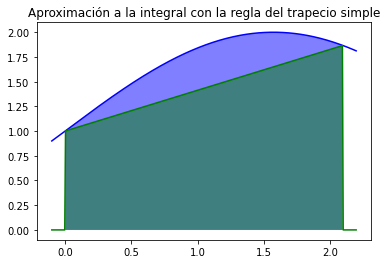

In [9]:
#Trapecio simple
a, b = 0, np.pi*2/3
N = 1
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)

def pl(a, b, fa, fb):
    def funcion(x):
        return fa + (x-a)*(fb - fa)/ (b-a)
    return funcion

trapecio = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [pl(nodos[i], nodos[i+1], f(nodos[i]), f(nodos[i+1])) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, trapecio, 'g')
plt.title('Aproximación a la integral con la regla del trapecio simple')
plt.fill_between(xs, trapecio, facecolor='g', alpha=0.5)

**Regla de Simpson**

En la regla de Simpson, aproximamos la función $f$ en el intervalo $[a,b]$ por un __polinomio cuadrático__ que concide con $f$ en $a$, $b$ y $(a+b)/2$ (es un polinomio interpolador de grado $2$), e integramos este polinomio.

El resultado es:

$$
\int_a^b f(x)\:d x \approx \frac{(b-a)}{6}f(a)+\frac{4(b-a)}{6}f\left(\frac{a+b}{2}\right)+\frac{(b-a)}{6}f(b)
$$

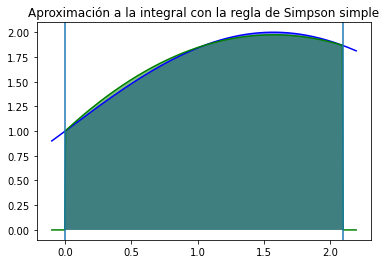

In [10]:
#Simpson simple
a, b = 0, np.pi*2/3
N = 1
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)

def pq(a, b, fa, fb, fab2):
    '''devuelve una funcion que corresponde al polinomio de grado 2 que pasa por
    (a,fa), (b, fb), ((a+b)/2, fab2)
    '''
    return lagrange((a,(a+b)/2,b), (fa, fab2, fb))

trapecio = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [pq(nodos[i], nodos[i+1], f(nodos[i]), f(nodos[i+1]), f((nodos[i] + nodos[i+1])/2)) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, trapecio, 'g')
plt.fill_between(xs, trapecio, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla de Simpson simple')
for nodo in nodos:
    plt.axvline(x=nodo)

### Ejercicio

 - Escribe una función que aproxima a integral a una función `f` en un intervalo [`a`, `b`] mediante la regla del trapecio simple
 - Realiza los cálculos a mano, o busca en tus apuntes de grado, o en internet, el resultado de integrar el polinomio interpolador de la regla de Simpson, escribe una función que implementa esta regla de cuadratura.

In [11]:
def T(f, a, b):
    return 0.5 * (b-a) * (f(a) + f(b))

In [12]:
def simpson(f, a, b):
    h = b - a
    return h/6. * f(a) + 4/6. * h * f(0.5 * (b + a)) + h/6. * f(b)

In [13]:
def f_lin(x):
    m = 5.
    n = 2.
    return m * x + n

def f_parabol(x):
    a = 2.
    b = 3.
    c = 4.
    return a * x*x + b * x + c

print(simpson(f_parabol, 0, 1))
print(T(f_lin, 0, 1))

6.166666666666667
4.5


## Grado de exactitud de una regla de cuadratura

Se dice que una regla de cuadratura tiene **grado de exactitud** igual a $M\geq 0$ si halla exactamente la integral de cada polinomio de grado $\leq M$; pero no halla exactamente la integral de algún polinomio de grado $M+1$. 

- **Reglas con grado de exactitud igual a cero.** Las reglas del punto derecho y del punto izquierdo.
- **Reglas con grado de exactitud igual a uno.** La regla del punto medio y la regla de los trapecios.
- **Reglas con grado de exactitud igual a tres.** La regla de Simpson.

## Como se obtienen las reglas de cuadratura

La forma más sencilla de obtener reglas de cuadratura con grado de exactitud $\geq N$ consiste en:

- tomamos $N+1$ puntos distintos en el intervalo $[a,b]$:

$$
x_0,x_1,\dots,x_N
$$

- formamos el polinomio de interpolación $P(x)$ asociado a esos puntos y a los valores

$$
f(x_0),f(x_1),\dots,f(x_N);
$$

si lo expresamos en forma de Lagrange,

$$
P(x)=f(x_0)\ell_0(x)+f(x_1)\ell_1(x)+\dots+f(x_N)\ell_N(x),
$$

siendo $\ell_0(x),\ell_1(x),\dots,\ell_N(X)$ los polinomios de la base de Lagrange.

- Aproximamos:

$$
\int_a^b f(x)\:d x \approx \int_a^b P(x)\:d x = 
$$
$$
=f(x_0)\int_a^b \ell_0(x)\:d x+f(x_1)\int_a^b \ell_1(x)\:d x+\dots+f(x_N)\int_a^b \ell_N(x) \:d x
$$

Los números:

$$
\alpha_i=\int_a^b \ell_i(x)\:d x
$$

se llaman **pesos** de la regla de cuadratura

$$
\int_a^b f(x)\:d x \approx \alpha_0 f(x_0) + \alpha_1 f(x_1) +\dots + \alpha_N f(x_N).
$$

Se puede demostrar que dados $N+1$ puntos distintos en $[a,b]$ existe una única elección de pesos de forma que la regla de cuadratura asociada por esos puntos tiene grado de exactitud $\geq N$.

### Ejercicio

Prueba que los pesos de cualquier regla de cuadratura obtenida mediante el procedimiento anterior suman la longitud del intervalo de integración.

Es fácil de ver que, escogiendo $f(x) = 1$, se obtiene el resultado pedido. Tomando la fórmula
$$
\int_a^b f(x) \; dx \simeq \alpha_0 f(x_0) \;+ \dots + \;\alpha_N f(x_N),
$$

y haciendo $f(x) = 1$ se obtiene
$$
\int_a^b 1 \; dx \simeq \alpha_0 \;+ \dots + \;\alpha_N,
$$
es decir,
$$
\left[x \right]^b_a = (b -a) = \sum_{k=0}^N \alpha_k
$$


## Fórmulas de Newton-Cotes

Cuando los puntos $x_0,x_1,\dots,x_N$ se toman *equiespaciados*, las reglas de cuadratura asociada se llaman reglas de **Newton-Cotes**. Las hay de dos tipos:
- **Cerradas.** Si el primer y último punto coinciden con los extremos del intervalo:
$$
x_0=a,\:x_1=a+\frac{b-a}{N},\dots, x_{N-1}=b-\frac{b-a}{N}=a+\frac{b-a}{N}(N-1),\: x_N=b.
$$
Son de este tipo la regla de los trapecios y la regla de Simpson.
- **Abiertas.** El primer y último puntos están condenidos en el interior del intervalo, y están a la misma distancia del extremo inferior y superior que cualesquiera dos puntos consecutivos:
$$
a<x_0=a+\frac{b-a}{N+2},\: x_1=a+2\frac{b-a}{N+2},\dots x_N=b-h=a+(N+1)\frac{b-a}{N+2}<b.
$$

In [14]:
x = sym.Symbol('x')

n = 2
l_an = [sym.Symbol('a_%d'%j) for j in range(n+1)]
v_an = sym.Matrix(l_an)
monomios = [x**j for j in range(n+1)]
p = sum(ai*xi for (ai,xi) in zip(l_an, monomios))
sym.pprint(p)

                2
a₀ + a₁⋅x + a₂⋅x 


In [15]:
ps = np.linspace(0,1,n+1)

def poli_base(i):
    pi = ps[i]
    return sym.prod((x - ps[j])/(pi - ps[j]) for j in range(n+1) if j!=i)

sym.pprint(poli_base(0))

(1.0 - 2.0⋅x)⋅(1.0 - x)


In [16]:
coefs = [sym.nsimplify(poli_base(i).integrate((x,0,1))) for i in range(n+1)]
coefs

[1/6, 2/3, 1/6]

In [17]:
x = sym.Symbol('x')
def poli_base(i,n):
    pi = ps[i]
    return sym.prod((x - ps[j])/(pi - ps[j]) for j in range(n+1) if j!=i)

for n in range(1,10):
    ps = [sym.Rational(i,n) for i in range(n+1)]
    coefs = [poli_base(i,n).integrate((x,0,1)) for i in range(n+1)]
    print('#'*5 + ' grado ' + str(n) + ' ' + '#'*5)
    print()
#    print(n, coefs)
    g = sym.Function('f')
    sym.pprint(sum(c*g(sym.Rational(j,n)) for j,c in enumerate(coefs)))
    print()


##### grado 1 #####

f(0)   f(1)
──── + ────
 2      2  

##### grado 2 #####

f(0)   2⋅f(1/2)   f(1)
──── + ──────── + ────
 6        3        6  

##### grado 3 #####

f(0)   3⋅f(1/3)   3⋅f(2/3)   f(1)
──── + ──────── + ──────── + ────
 8        8          8        8  

##### grado 4 #####

7⋅f(0)   16⋅f(1/4)   2⋅f(1/2)   16⋅f(3/4)   7⋅f(1)
────── + ───────── + ──────── + ───────── + ──────
  90         45         15          45        90  

##### grado 5 #####

19⋅f(0)   25⋅f(1/5)   25⋅f(2/5)   25⋅f(3/5)   25⋅f(4/5)   19⋅f(1)
─────── + ───────── + ───────── + ───────── + ───────── + ───────
  288         96         144         144          96        288  

##### grado 6 #####

41⋅f(0)   9⋅f(1/6)   9⋅f(1/3)   34⋅f(1/2)   9⋅f(2/3)   9⋅f(5/6)   41⋅f(1)
─────── + ──────── + ──────── + ───────── + ──────── + ──────── + ───────
  840        35        280         105        280         35        840  

##### grado 7 #####

751⋅f(0)   3577⋅f(1/7)   49⋅f(2/7)   2989⋅f(3/7)   2989⋅f(4/7)   49

Cuando $N$ es grande las reglas de Newton-Cotes presentan **inestabilidad**; está ligado al fenómeno de Runge que vimos en el capítulo de interpolación: la base de Lagrange tiene "artefactos", que se exageran en los extremos del intervalo, y por supuesto más allá...

En particular, a partir de $N=8$ algunos de los pesos son negativos y para $N$ mayor son cada vez más grandes y oscilantes (recuerda que los pesos tienen que sumar uno). Como resultado de esto, estas reglas de cuadratura son muy sensibles a los errores al evaluar $f(x)$. Esto hace que evaluar dichas reglas de cuadratura sea complicado cuando trabajamos en coma flotante. 

## Cuadratura Gaussiana

Como ocurría con el problema de interpolación, dado $N$ hay una única elección de puntos que hacen que la regla de cuadratura obtenida a través de interpolación por esos puntos tenga grado de exactitud máximo.

Estas reglas de conocen como **reglas de cuadratura Gaussiana**. Dado $N$ existe una única eleccióon de puntos $a\leq x_0<\dots<x_N\leq b$ de forma que la regla de cuadratura obtenida por interpolación por esos puntos tenga grado de exactitud $2N-1$. 

Cualquier otra regla de cuadratura por $N$ puntos tiene grado de exactitud $<2N-1$.

### Ejercicio

Investiga, en internet, en un libro o en [estos apuntes](./GaussianQ.pdf), cómo se obtienen los nodos $x_0,\dots,x_N$ de la regla de cuadratura Gaussiana por $N$ puntos. ¿Cuáles son esos nodos cuando $N=2$ y $N=1$?

In [18]:
t = sym.symbols('t')
ff = np.array([sym.integrate(1, (t, 0., 1.)),
              sym.integrate(t, (t, 0., 1.))])

x1, w1  = sym.symbols('x1 w1')

expr0 = w1 - ff[0]
expr1 = w1 * x1 - ff[1]

s = sym.solve((expr0, expr1), (x1, w1))
print(s)

[(0.500000000000000, 1.00000000000000)]


In [19]:
t = sym.symbols('t')
ff = np.array([sym.integrate(1, (t, 0., 1.)),
              sym.integrate(t, (t, 0., 1.)),
              sym.integrate(t**2, (t, 0., 1.)),
              sym.integrate(t**3, (t, 0., 1.))])

x1, x2, w1, w2  = sym.symbols('x1 x2 w1 w2')

expr0 = w1 + w2 - ff[0]
expr1 = w1 * x1 + w2 * x2 - ff[1]
expr2 = w1 * x1**2 + w2 * x2**2 - ff[2]
expr3 = w1 * x1**3 + w2 * x2**3 - ff[3]

s = sym.solve((expr0, expr1, expr2, expr3), (x1, x2, w1, w2))
print(s)

[(0.211324865405187, 0.788675134594813, 0.500000000000000, 0.500000000000000), (0.788675134594813, 0.211324865405187, 0.500000000000000, 0.500000000000000)]


## Estimación del error

Se tienen las siguientes estimaciones para el error cometido al aproximar la integral

$$
\int_a^b f(x)\:d x
$$

mediante una regla de cuadratura.

- **Regla del punto izquierdo.** Existe $\eta$ en $[a,b]$ tal que

$$
\int_a^b f(x)\:d x - (b-a)f(a) = \frac{(b-a)^2}{2}f'(\eta).
$$

- **Regla del punto medio.** Existe $\eta$ en $[a,b]$ tal que

$$
\int_a^b f(x)\:d x - (b-a)f\left(\frac{a+b}{2}\right) = \frac{(b-a)^3}{24}f''(\eta).
$$

- **Regla de los trapecios.** Existe $\eta$ en $[a,b]$ tal que

$$
\int_a^b f(x)\:d x - \left[\frac{(b-a)}{2}f(a)+\frac{(b-a)}{2}f(b)\right] = -\frac{(b-a)^3}{12}f''(\eta).
$$

- **Regla de Simpson.** Existe $\eta$ en $[a,b]$ tal que

$$
\int_a^b f(x)\:d x - \left[ \frac{(b-a)}{6}f(a)+\frac{4(b-a)}{6}f\left(\frac{a+b}{2}\right)+\frac{(b-a)}{6}f(b) \right]=-\frac{(b-a)^5}{2880}f^{(iv)}(\eta).
$$

## Reglas compuestas

En las reglas compuestas descomponemos el intervalo de integración es $N$ partes (subintervalos), y en cada parte aplicamos la regla de integración correspbondiente.

Describamos estas reglas en el caso en que los subintervalos tienen todos la misma longitud:

$$
h:=\frac{b-a}{N},
$$

de manera que $[a,b]$ queda dividido en los subintervalos:

$$
[a,a+h],\:[a+h,a+2h]\:,\dots,[a+(N-1)h,a+Nh]=[b-h,b].
$$

**Regla del punto derecho compuesta.** Corresponde a aplicar la regla del punto derecho a cada subintervalo y sumar cada contribución. El resultado es:

$$
\int_a^b f(x)\:d x \approx hf(a+h)+hf(a+2h)+\dots+hf(a+(N-1)h)+hf(b).
$$

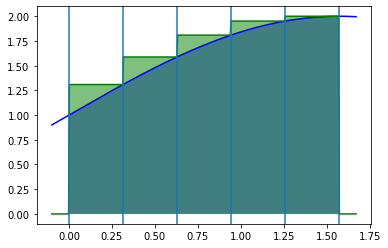

In [20]:
#Punto derecho
a, b = 0, np.pi/2
N = 5
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)
punto_derecho = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [f(nodos[i+1]) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, punto_derecho, 'g')
plt.fill_between(xs, punto_derecho, facecolor='g', alpha=0.5)
for nodo in nodos:
    plt.axvline(x=nodo)

**Regla del punto medio compuesta.** Corresponde a aplicar la regla del punto medio a cada subintervalo y sumar cada contribución. El resultado es:

$$
\int_a^b f(x)\:d x \approx hf(a+h/2)+hf(a+3/2h)+\dots+hf(a+(2N-3)/2h)+hf(a+(2N-1)/2h).
$$

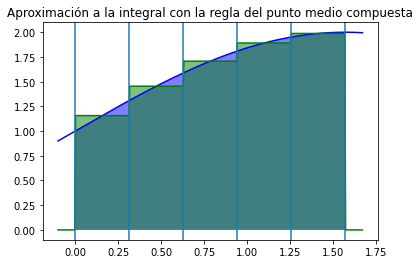

In [21]:
#Punto medio
a, b = 0, np.pi/2
N = 5
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)
punto_medio = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [f((nodos[i] + nodos[i+1])/2) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, punto_medio, 'g')
plt.fill_between(xs, punto_medio, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla del punto medio compuesta')
for nodo in nodos:
    plt.axvline(x=nodo)

**Regla del punto izquierdo compuesta.** Corresponde a aplicar la regla del punto izquierdo a cada subintervalo y sumar cada contribución. El resultado es:

$$
\int_a^b f(x)\:d x \approx hf(a)+hf(a+h)+\dots+hf(a+(N-2)h)+hf(f(a+(N-1)h)).
$$

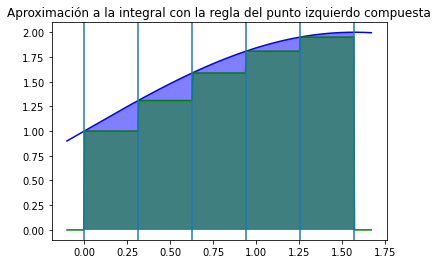

In [22]:
#Punto izquierdo
a, b = 0, np.pi/2
N = 5
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)
punto_izquierdo = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [f(nodos[i]) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, punto_izquierdo, 'g')
plt.fill_between(xs, punto_izquierdo, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla del punto izquierdo compuesta')
for nodo in nodos:
    plt.axvline(x=nodo)

**Reglas de los trapecios compuesta.** Corresponde a aplicar la regla los trapecios a cada subintervalo y sumar cada contribución. El resultado es:

$$
\int_a^b f(x)\:d x \approx \frac{h}{2}f(a)+hf(a+h)+\dots+hf(a+(N-2)h)+hf(f(a+(N-1)h))+\frac{h}{2}f(a+Nh).
$$

In [23]:
#Trapecio
a, b = 0, 2*np.pi
N = 5
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)

def pl(a, b, fa, fb):
    def funcion(x):
        return fa + (x-a)*(fb - fa)/ (b-a)
    return funcion

trapecio = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [pl(nodos[i], nodos[i+1], f(nodos[i]), f(nodos[i+1])) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, trapecio, 'g')
plt.fill_between(xs, trapecio, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla del trapecio compuesta')
for nodo in nodos:
    plt.axvline(x=nodo)

**Regla de Simpson compuesta.** Corresponde a aplicar la regla de Simpson a cada subintervalo y sumar cada contribución. El resultado es:

$$
\int_a^b f(x)\:d x \approx \frac{h}{6}f(a)+\frac{4h}{6}f(a+h/2)+\frac{h}{6}f(a+h)\dots+\frac{h}{6}f(a+(N-1)h)+\frac{4h}{6}f(a+(N-1/2)h)+\frac{h}{6}f(a+Nh).
$$

In [24]:
#Simpson
a, b = 0, 2*np.pi
N = 3
nodos = np.linspace(a, b, N+1)

eps  = 0.1
xs = np.linspace(a-eps,b+eps,400)
ys = f(xs)

def pq(a, b, fa, fb, fab2):
    '''devuelve una funcion que corresponde al polinomio de grado 2 que pasa por
    (a,fa), (b, fb), ((a+b)/2, fab2)
    '''
    return lagrange((a,(a+b)/2,b), (fa, fab2, fb))

trapecio = np.piecewise(xs, 
    [xs < a] + [((nodos[i] <= xs) & (xs < nodos[i+1])) for i in range(N)] + [b <= xs ], 
    [0] + [pq(nodos[i], nodos[i+1], f(nodos[i]), f(nodos[i+1]), f((nodos[i] + nodos[i+1])/2)) for i in range(N)] + [0])

plt.plot(xs, ys, 'b')
plt.fill_between(xs, ys, where=(a<=xs) & (xs<=b), 
                  facecolor='b', alpha=0.5)
plt.plot(xs, trapecio, 'g')
plt.fill_between(xs, trapecio, facecolor='g', alpha=0.5)
plt.title('Aproximación a la integral con la regla de Simpson compuesta')
for nodo in nodos:
    plt.axvline(x=nodo)

### Implementando las reglas compuestas

Queremos escribir funciones que devuelvan la aproximación a la integral mediante las reglas compuestas, es decir, un número.

Podemos seguir dos enfoques:
 - Llamar a la función que implementa la regla simple.
 - Hacer las cuentas que corresponden a la regla compuesta directamente, que será más eficiente.
 
Mostramos los dos enfoques para la [regla del punto medio](https://en.wikipedia.org/wiki/Riemann_sum#Midpoint_rule):

In [25]:
def punto_medio_compuesto_v1(f, a, b, N):
    '''Aproxima la integral de f en el intervalo [a,b] usando la regla
    del punto medio compuesta. Evalua la función en el punto medio de
    cada subintervalo
    
    El primer argumento es una función de variable real a valores reales
    '''
    h = (b-a)/N
    total = 0
    for j in range(N):
        xj = a + j*h
        total = total + punto_medio_simple(f, xj, xj+h)
    return total

In [26]:
def punto_medio_compuesto_v2(f, a, b, N):
    '''Aproxima la integral de f en el intervalo [a,b] usando la regla
    del punto medio compuesta. Evalua la función en el punto medio de
    cada subintervalo
    
    El primer argumento es una función de variable real a valores reales
    '''
    h = (b-a)/N
    puntos_medios = np.linspace(a + h/2, b-h/2, N)
    return h*sum(f(puntos_medios))

Comprobamos que obtenemos el mismo resultado

In [27]:
f = lambda x: 1 + np.sin(x)
a, b = 0, np.pi
N = 5

integral, error = quad(f, a, b)
print(integral)
print(punto_medio_compuesto_v1(f, a, b, N))
print(punto_medio_compuesto_v2(f, a, b, N))

5.141592653589792
5.174874130515897
5.174874130515897


### Ejercicio

 - Escribe una función que devuelva la aproximación a la integral de `f` en un intervalo [`a`,`b`], usando la regla del trapecio compuesta con `N` subintervalos.
 - Escribe una función que devuelva la aproximación a la integral de `f` en un intervalo [`a`,`b`], usando la regla de Simpson compuesta con `N` subintervalos.

In [28]:
def TC(f, a, b, N):
    
    # Suponemos que b > a
    # Definimos un array de nodos:
    xjj = np.linspace(a, b, N+1)
    print(xjj)
    
    # We are going to add the different pieces in the variable I
    I = 0
    for jj in range(N):
        I += T(f, xjj[jj], xjj[jj+1])
    
    # Return the result:
    return I

def simpsonC(f, a, b, N):
    
    # Suponemos que b > a
    # Definimos un array de nodos:
    xjj = np.linspace(a, b, N+1)
    print(xjj)
    
    # We are going to add the different pieces in the variable I
    I = 0
    for jj in range(N):
        I += simpson(f, xjj[jj], xjj[jj+1])
    
    # Return the result:
    return I

In [29]:
print(TC(f_parabol, 0., 5., 10))
print(simpsonC(f_parabol, 0, 5., 10))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
141.25
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
140.83333333333331


In [30]:
# Definimos ahora una funcion que calcula por defecto usando el trapecio
# pero a la que podemos especificar que use Simpson:
def cuadratura(f, a, b, N, metodo='lin'):
    
    # Suponemos que b > a
    # Definimos un array de nodos:
    xjj = np.linspace(a, b, N+1)
    
    # We are going to add the different pieces in the variable I
    I = 0.
    if metodo == 'lin':
        for jj in range(N):
            I += T(f, xjj[jj], xjj[jj+1])
    elif metodo == 'simp':
        for jj in range(N):
            I += simpson(f, xjj[jj], xjj[jj+1])
    else:
        print('Error! No conozco este metodo...')
    
    # Devolvemos el resultado:
    return I

print(cuadratura(f_parabol, 0., 5., 10))

141.25


In [31]:
# Comparamos ahora el error cometido al integrar varias funciones
# y como evoluciona con el numero de nodos:
def f_exp(x):
    return np.exp(x)

def f_otra(x):
    return (10*x**2 - x**3 ) / np.exp(x)

# Calculamos la integral entre 0 y 5:
a = 0.
b = 5.

t = sym.Symbol('t')
#exact = sym.integrate(sym.exp(t), (t, a, b))
exact = sym.integrate( (10*t**2 - t**3)/ sym.exp(t), (t, a, b))
print(exact)

simp_vals = []
trap_vals = []

for n in range(2,50):
    simp_vals.append(cuadratura(f_otra, a, b, n, 'simp'))
    trap_vals.append(cuadratura(f_otra, a, b, n))

sv = np.array(trap_vals)
tv = np.array(simp_vals)
sv = np.abs((sv - exact)/exact)
tv = np.abs((tv - exact)/exact)

plt.semilogy(sv, 'r-')
plt.semilogy(tv, 'c-')

13.0971151021225


## Estimación del error para las reglas compuestas

Si se quiere estimar el error $E$ cometido al aproximar la integral

$$
\int_a^b f(x)\:d x
$$

mediante una regla de cuadratura compuesta asociada a una descomposición de $[a,b]$ en subintervalos de extremos:

$$
a \leq x_0 < x_1 < \dots < x_{N-1} < x_N \leq b,
$$

entonces basta estimar el error $E_i$ que se comete en cada subintervalo $[x_{i-1},x_i]$ y estimar el error total $E$ mediante

$$
|E|\leq |E_1|+|E_2|+\dots+|E_N|.
$$

Escribimos:

$$
K_n:=\max_{x\in [a,b]}|f^{(n)}(x)|,
$$

$K_n$ es el valor máximo que toma la derivada de orden $n$ de $f(x)$ en el intervalo $[a,b]$, y

$$
h=\max_{i=1,\dots,N}|x_i - x_{i-1}|.
$$

Estimemos el error total para la **regla del punto izquierdo/derecho compuesta**. 

$$
|E| \leq  |E_1|+|E_2|+\dots+|E_N| \leq 
$$
$$\leq h\frac{(x_{1}-x_0)}{2}K_1+h\frac{(x_{2}-x_1)}{2}K_1+\dots+h\frac{(x_{N-1}-x_N)}{2}K_1 \leq
$$
$$
\leq h\frac{b-a}{2}K_1.
$$

Si hacemos el mismo razonamiento con las otras reglas compuestas, obtenemos:

- **Regla del punto medio compuesta.** 

$$
|E| \leq h^2\frac{(b-a)}{24}K_2.
$$

- **Regla de los trapecios compuesta.** Existe $\eta$ en $[a,b]$ tal que

$$
|E| \leq h^2 \frac{(b-a)}{12}K_2.
$$

- **Regla de Simpson compuesta.** Existe $\eta$ en $[a,b]$ tal que

$$
|E| \leq h^4\frac{(b-a)}{2880}K_4.
$$

### Ejercicio

Aplica la regla de Simpson compuesta implementada en el ejercicio anterior para calcular numéricamente las integrales
1. $\int_{0}^{1} \exp(-x^{2})dx=0.74682413281242702...$

2. $\int_{0}^{3}\left|  \cos\left(  x\right)  \right|  \exp\left(  -x/10\right)dx=1.61523492777325443...$

3. $\int_{0}^{2}\cos\left(  x\right)  \exp\left(  -\sqrt{x}\right)  dx=0.49060485069310796...$

Representa gráficamente el error cometido (con respecto al valor dado arriba) para los valores $h=(b-a)/2^j$ con $j=1,2,\dots,7$. En el eje $x$ debe representarse $h$ (para los distintos $j$), y en el eje $y$ el error correspondiente.


In [71]:
# Definimos las funciones
def f_1(x):
    return np.exp(-x*x)

def f_2(x):
    return np.abs(np.cos(x))*np.exp(-x/10.)

def f_3(x):
    return np.cos(x)*np.exp(-np.sqrt(x))

# Definimos los valleftores exactos:
exact_1 = 0.74682413281242702
exact_2 = 1.61523492777325443
exact_3 = 0.49060485069310796

In [72]:
# Resolvemos el ejercicio con la primera de las funciones:
# Definimos el intervalo:
a = 0.
b = 1.

# Definimos una lista donde guardar los resultados:
cuads = []
nn = 10

# Bucle sobre el numero de intervalos:
for N in 2**np.arange(1, nn, 1):
    cuads.append(cuadratura(f_1, a, b, N, 'simp'))

errors_1 = np.abs( (np.array(cuads) -  exact_1) / exact_1 )
hs = (b-a) / 2**np.arange(1, nn, 1)
plt.loglog(hs, errors_1, 'b-')
plt.loglog(hs, hs**4, 'c')
plt.loglog(hs, np.repeat(1e-4, len(hs)), 'k-')

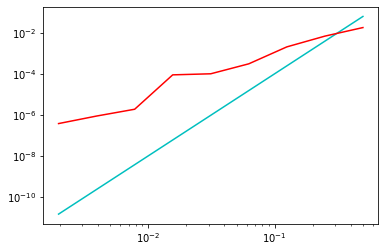

In [75]:
# Resolvemos el ejercicio con la segunda de las funciones:
# Definimos el intervalo:
a = 0.
b = 3.

# Definimos una lista donde guardar los resultados:
cuads = []

for N in 2**np.arange(1, nn, 1):
    cuads.append(cuadratura(f_2, a, b, N, 'simp'))

errors_2 = np.abs( (np.array(cuads) -  exact_2) / exact_2 )
#plt.loglog(hs, np.repeat(1e-4, len(hs)), 'k-')
plt.loglog(hs, hs**4, 'c')
plt.loglog(hs, errors_2, 'r-')
plt.show()

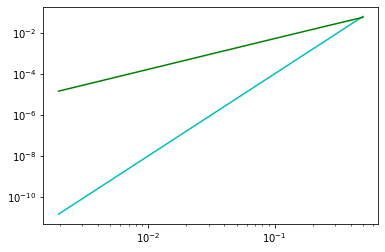

In [77]:
# Resolvemos el ejercicio con la tercera de las funciones:
# Definimos el intervalo:
a = 0
b = 2.

# Definimos una lista donde guardar los resultados:
cuads = []

for N in 2**np.arange(1, nn, 1):
    cuads.append(cuadratura(f_3, a, b, N, 'simp'))

errors_3 = np.abs( (np.array(cuads) -  exact_3) / exact_3 )
#plt.loglog(hs, np.repeat(1e-4, len(hs)), 'k-')
plt.loglog(hs, hs**4, 'c')
plt.loglog(hs, errors_3, 'g-')

### Ejercicio (cont.)

Continuación del anterior. A la vista de los resultados obtenidos, ¿cuántos subintervalos son necesarios en cada caso para obtener un error menor que $10^{-4}$?

El error es proporcional a $h^\alpha$ con un $\alpha$ distinto para cada integral. Determina dicho exponente $\alpha$ y compáralo con la cota del error de la regla de Simpson compuesta. ¿Por qué el resultado es peor para las integrales 2 y 3?


### Obtención del orden de convergencia

En general, el error en función del parámetro de discretización, $h$ será del orden de un polinomio de $h$:
$$
E(h) \simeq h^{\alpha}
$$

Si tomamos logaritmos, nos queda
$$
\log(E(h)) \simeq \log(h^{\alpha}) = \alpha \cdot \log(h),
$$
de donde se deduce que si pintamos $log(E)$ frente a $log(h)$, la curva resultante será una recta con pendiente $\alpha$. 

4.01291736031447
1.9427312710678195
1.4941416736746695


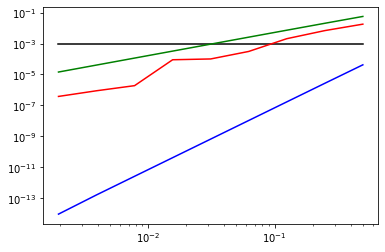

In [36]:
# Dibujamos las graficas:
plt.loglog(hs, np.repeat(10e-4, len(hs)), 'k-')
plt.loglog(hs, errors_1, 'b-')
plt.loglog(hs, errors_2, 'r-')
plt.loglog(hs, errors_3, 'g-')
#plt.loglog(hs, hs**4, 'c-')

# Estimamos la peniente de estas "rectas":
alpha_1 = np.sum((np.log(errors_1[1:]) - np.log(errors_1[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_1) - 1.)
print(alpha_1)
alpha_2 = np.sum((np.log(errors_2[1:]) - np.log(errors_2[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_2) - 1.)
print(alpha_2)
alpha_3 = np.sum((np.log(errors_3[1:]) - np.log(errors_3[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_3) - 1.)
print(alpha_3)


El resultado es peor para las integrales 2 y 3 porque: en el caso (2), el integrando no es derivable en un punto del intervalo de integración, el $x = \pi/2$. En (3), la derivada existe en todos los puntos del intervalo de integración $(0,2)$; pero no está acotada: tiende a infinito cuando $x$ se acerca a $0$. En ambos casos el análisis del error que hemos hecho previamente no se puede llevar a cabo.

In [67]:
x_eval = np.linspace(0,3,200)
y_eval = np.abs(np.cos(x))*np.exp(-0.1*x)

plt.plot(x_eval,y_eval)
plt.title('Gráfica de $|\cos(x)|e^{-x/10}$')
plt.show()


In [68]:
x_eval = np.linspace(0,2,200)
y_eval = np.cos(x)*np.exp(-np.sqrt(x))

plt.plot(x_eval,y_eval)
plt.title('Gráfica de $\cos(x)e^{-\sqrt{x}}$')
plt.show()

### Ejercicio (cont.)

Un modo de mejorar el resultado en la integral 2. de los ejercicios anteriores es descomponiéndola como $\int_0^3=\int_0^{\pi/2} + \int_{\pi/2}^3$. Compara el valor así obtenido con los del ejercicio anterior para los mismos valores de $h$. ¿Qué método es mejor? ¿Por qué?

In [37]:
cuads = []

for N in 2**np.arange(1, nn, 1):
    I1 = cuadratura(f_2, 0., np.pi/2., N, 'simp')
    I2 = cuadratura(f_2, np.pi/2., 3., N, 'simp')
    cuads.append(I1 + I2)

errors_2b = np.abs( (np.array(cuads) -  exact_2) / exact_2 )
plt.loglog(hs, hs**4, 'c-')
plt.loglog(hs, errors_2b, 'r')

alpha_2b = np.sum((np.log(errors_2b[1:]) - np.log(errors_2b[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_1) - 1.)
print(alpha_2b)

4.007279836083397


4.01291736031447
4.007279836083397
1.4941416736746695


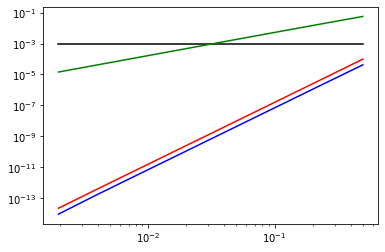

In [38]:
# Dibujamos las graficas:
plt.loglog(hs, np.repeat(10e-4, len(hs)), 'k-')
plt.loglog(hs, errors_1, 'b-')
plt.loglog(hs, errors_2b, 'r-')
plt.loglog(hs, errors_3, 'g-')

# Estimamos la pendiente de estas "rectas":
alpha_1 = np.sum((np.log(errors_1[1:]) - np.log(errors_1[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_1) - 1.)
print(alpha_1)
alpha_2b = np.sum((np.log(errors_2b[1:]) - np.log(errors_2b[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_2b) - 1.)
print(alpha_2b)
alpha_3 = np.sum((np.log(errors_3[1:]) - np.log(errors_3[:-1])) / (np.log(hs[1:]) - np.log(hs[:-1])))/(len(errors_3) - 1.)
print(alpha_3)

### Una curiosidad ¿cómo arreglamos el caso (3)?

Hacemos un cambio de variable:

$$
t = \sqrt{x}, \; x = t^2, \; dx = 2tdt
$$

que convierte la integral en:

$$
\int_0^2 \cos(x) e^{-\sqrt{x}}dx = \int_0^{\sqrt{2}} \cos(t^2) 2t e^{-t} dt.
$$

La derivada del nuevo integrando está bien definida y está acotada en el intervalo $(0,2)$. 

In [78]:
# Resolvemos el ejercicio con la nueva funcion, despues de hacer el cambio de variable:
def f_4(x):
    return 2*t*np.cos(x**2)*np.exp(-x)

# Definimos el intervalo:
a = 0
b = 2.

# Definimos una lista donde guardar los resultados:
cuads = []

for N in 2**np.arange(1, nn, 1):
    cuads.append(cuadratura(f_4, a, b, N, 'simp'))

errors_4 = np.abs( (np.array(cuads) -  exact_3) / exact_3 )
#plt.loglog(hs, np.repeat(1e-4, len(hs)), 'k-')
plt.loglog(hs, hs**4, 'c')
plt.loglog(hs, errors_4, 'g-')


TypeError: can't convert expression to float

# Cuadratura adaptativa

Comenzamos con la regla del trapecio:

$$
T(f, a, b) = \frac{b-a}{2}(f(a) + f(b))
$$

```python
T(f, a, b) = (b-a)(f(a) + f(b))/2
```

__Objetivo__: integrar una función `f` en un intervalo [a,b], con un _error estimado_ menor que `tol`, haciendo el mínimo de cálculos.

> Llamamos al resultado `TA(f, a, b, tol)`: _'integral del trapecio adaptativa de la función `f` en el intervalo [`a`,`b`] con tolerancia `tol`'_.


__Mecanismo__:

 - Calcula `I1=T(f,a,b)` y por otro lado la integración según la regla del trapecio compuesta `I2=T(f, a, m) + T(f, m, b)`, para el punto medio `m = (a+b)/2`.
 - Los errores que cometen `I1` e `I2` es del tipo
$$
\int_a^b f(x)\:dx = I_1 + \frac{b-a}{12}h^2f''(\xi_1)
$$
$$
\int_a^b f(x)\:dx = I_2 + \frac{b-a}{12} \left(\frac{h}{2}\right)^2 f''(\xi_2)
$$
Si asumimos que $f''(\xi_1)\approx f''(\xi_2)$, podemos estimar el error:
$$
\int_a^b f(x)\:dx - I_2 \approx \frac{1}{3}(I_2 - I_1)
$$
 - Si esa _estimación del error_ es menor que la tolerancia, reportamos la integral `I2` => TA(f, a, b, tol) = I2
 - Si esa _estimación del error_ es mayor que la tolerancia, repetimos el proceso en cada subintervalo $[a,m]$ y $[m,b]$. _Atención_: nuestra tolerancia para toda la integral es `tol`, así que ahora le permitimos a cada subintervalo sólo la mitad de la tolerancia => TA(f, a, b, tol) = TA(f, a, m, tol/2) + TA(f, m, b, tol/2)
 
_Observación_: esta definición es [__recursiva__](https://es.wikipedia.org/wiki/Recursi%C3%B3n_(ciencias_de_computaci%C3%B3n)#Algoritmos_recursivos).

In [41]:
from visualizacion_trapecio import muestra_visualizacion_trapecio

def f(x):
    return np.sin(x)*np.exp(-x)
a,b = 0, 5
tols = [10**(-n) for n in range(4)]

muestra_visualizacion_trapecio(f, a, b, tols)

integral de la función 0.5022749400837604 ; estimación del error 6.008122851547437e-15
----------
tolerancia 1
estimación del error 0.043630146328852815
error 0.38753745344424373
número de iteraciones 3


----------
tolerancia 0.1
estimación del error 0.043630146328852815
error 0.38753745344424373
número de iteraciones 3


----------
tolerancia 0.01
estimación del error 0.003046978815878434
error 0.00082953244612749
número de iteraciones 13


----------
tolerancia 0.001
estimación del error 0.00046628201965793586
error 4.094693036948982e-05
número de iteraciones 32


### Implementación

In [42]:
def T(f,a,b):
    '''Regla del trapecio simple
    
    Aproxima la integral de f en el intervalo [a,b] por (b-a)*(f(a) + f(b))/2
    
    El primer argumento es una función de variable real a valores reales
    '''
    return (b-a)*(f(a) + f(b))/2

def TA(f, a, b, tol):
    '''Regla del trapecio adaptativa
    
    INPUTS:
    - f: integrando
    - a,b: extremos del intervalo de integración
    - tol: tolerancia para la regla de parada. El algoritmo se detiene cuando
    la estimación del error es menor que la tolerancia.
    '''
    I1 = T(f, a, b)
    m = (a+b)/2
    I2 = T(f, a, m) + T(f, m, b)
    #estimación del error
    E = (1/3)*np.abs(I1 - I2)
    if E<tol:
        return I2
    else:
        #llamada recursiva
        return TA(f, a, m, tol/2) + TA(f, m, b, tol/2)

In [43]:
def f(x):
    return np.sin(x)
a,b = 0, np.pi

#Evaluamos la integral con mucha precisión usando el metodo
# quad de scipy.integrate
i_quad, e = integ.quad(f,a,b)
print(i_quad, e)

#Imprimimos la integral y el error cometido para distintas tolerancias
# comparamos el error con la integral calculada con mucha precisión
print('-'*10)
for tol in [10**(-n) for n in range(10)]:
    i_adap = TA(f, a, b, tol)
    print(tol, np.abs(i_adap-i_quad))


2.0 2.220446049250313e-14
----------
1 0.4292036732051032
0.1 0.025768398054449193
0.01 0.006429656227660896
0.001 0.0004933386295313813
0.0001 4.7979784712381957e-05
1e-05 6.929788362697309e-06
1e-06 5.214505809369996e-07
1e-07 4.7463768915179116e-08
1e-08 6.969675503398776e-09
1e-09 5.207128062068023e-10


### Ejercicio

 - Mira en los apuntes, un libro, o en internet cuál es la estimación del error cuando usamos el método de Simpson adaptativo en vez del método del trapecio adaptativo. Implementa el método de Simpson adaptativo, y comprueba el resultado con el obtenido con la regla del trapecio adaptativa.

In [44]:
def simpsonA(f, a, b, tol):
    '''Regla de Simpson adaptativa
    
    INPUTS:
    - f: integrando
    - a,b: extremos del intervalo de integración
    - tol: tolerancia para la regla de parada. El algoritmo se detiene cuando
    la estimación del error es menor que la tolerancia.
    '''
    I1 = simpson(f, a, b)
    m = (a+b)/2
    I2 = simpson(f, a, m) + simpson(f, m, b)
   
    # Estimación del error
    E = (1/15)*np.abs(I1 - I2)
    
    if E<tol:
        return I2
    else:
        #llamada recursiva
        return simpsonA(f, a, m, tol/2) + simpsonA(f, m, b, tol/2)

In [45]:
#Evaluamos la integral con mucha precisión usando el metodo
# quad de scipy.integrate
i_quad, e = integ.quad(f,a,b)
print(i_quad, e)

#Imprimimos la integral y el error cometido para distintas tolerancias
# comparamos el error con la integral calculada con mucha precisión
Is_simp = []
Is_trap = []
tols = [10**(-n) for n in range(10)] 
for tol in tols:
    Is_simp.append(simpsonA(f, a, b, tol))
    Is_trap.append(TA(f, a, b, tol))

E_simp = np.abs((np.array(Is_simp) - i_quad) / i_quad)
E_trap = np.abs((np.array(Is_trap) - i_quad) / i_quad)

plt.loglog(tols, E_simp, 'r-')
plt.loglog(tols, E_trap, 'b-')

2.0 2.220446049250313e-14
